In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [11]:
import time
t0 = time.time()
print("Hello World")
p_time = time.time()- t0
print(p_time)

Hello World
0.0014667510986328125


In [17]:
import time
def sum_of_n_numbers(n):
    start_time = time.time()
    s = 0
    for i in range(1,n+1):
        s = s + i
    end_time = time.time()
    return s,end_time-start_time

n = 50000000
print("\nTime to sum of 1 to ",n," and required time to calculate is :",sum_of_n_numbers(n))


Time to sum of 1 to  50000000  and required time to calculate is : (1250000025000000, 5.134825944900513)


In [2]:
!pip install modin[dask] --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas

In [3]:
import modin.pandas as pd

In [3]:
import numpy as np
array=np.random.randint(low=100,high=10000,size=(2**18,2**8))
#array
np.savetxt("foo.csv", array, delimiter=",") #how to generate array

In [4]:
%%time
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_df.head()

Wall time: 37.9 s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,1047.0,2433.0,2513.0,6826.0,2740.0,4986.0,2538.0,9435.0,7812.0,9775.0,...,7430.0,7513.0,5911.0,5896.0,3421.0,5913.0,4428.0,3104.0,7901.0,7093.0
1,9251.0,6866.0,7858.0,2659.0,6523.0,6633.0,7852.0,4832.0,4894.0,2713.0,...,753.0,7801.0,522.0,4912.0,6338.0,4643.0,5845.0,2416.0,7487.0,4547.0
2,326.0,436.0,4915.0,7570.0,6994.0,9845.0,9513.0,5418.0,8739.0,4257.0,...,3460.0,3456.0,7752.0,362.0,5413.0,4876.0,6573.0,1310.0,7611.0,5223.0
3,6528.0,3255.0,597.0,3161.0,7106.0,2043.0,3748.0,5327.0,9991.0,5768.0,...,4716.0,7430.0,1368.0,8732.0,5365.0,3223.0,806.0,732.0,7958.0,6865.0
4,9072.0,967.0,313.0,2934.0,376.0,7940.0,208.0,356.0,2707.0,6585.0,...,5024.0,2346.0,7775.0,4947.0,6923.0,2440.0,3430.0,8237.0,3719.0,4967.0


In [5]:
%%time
# import os
# os.environ["MODIN_CPUS"] = "4"
# from distributed import Client
# client = Client()
import modin.pandas as pd
modin_df=pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_df.head()

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



Wall time: 33 s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,1047.0,2433.0,2513.0,6826.0,2740.0,4986.0,2538.0,9435.0,7812.0,9775.0,...,7430.0,7513.0,5911.0,5896.0,3421.0,5913.0,4428.0,3104.0,7901.0,7093.0
1,9251.0,6866.0,7858.0,2659.0,6523.0,6633.0,7852.0,4832.0,4894.0,2713.0,...,753.0,7801.0,522.0,4912.0,6338.0,4643.0,5845.0,2416.0,7487.0,4547.0
2,326.0,436.0,4915.0,7570.0,6994.0,9845.0,9513.0,5418.0,8739.0,4257.0,...,3460.0,3456.0,7752.0,362.0,5413.0,4876.0,6573.0,1310.0,7611.0,5223.0
3,6528.0,3255.0,597.0,3161.0,7106.0,2043.0,3748.0,5327.0,9991.0,5768.0,...,4716.0,7430.0,1368.0,8732.0,5365.0,3223.0,806.0,732.0,7958.0,6865.0
4,9072.0,967.0,313.0,2934.0,376.0,7940.0,208.0,356.0,2707.0,6585.0,...,5024.0,2346.0,7775.0,4947.0,6923.0,2440.0,3430.0,8237.0,3719.0,4967.0


In [5]:
def plotter(outputdict):
    fig = plt.figure(figsize = (10, 5)) 
    plt.bar(outputdict.keys(),outputdict.values(),color='blue',width=0.4)
    plt.xlabel("Python Package")
    plt.ylabel("Runtime(seconds)")
    plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt
t0 = time.time()
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_time = time.time()- t0

t1 = time.time()
modin_df = pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_time = time.time() - t1

print("Pandas Time(seconds):",pandas_time,"\nModin Time(seconds):",modin_time)
outputDict={"Pandas":pandas_time,"Modin":modin_time}
plotter(outputDict)

Pandas Time(seconds): 25.217426776885986 
Modin Time(seconds): 11.177661418914795


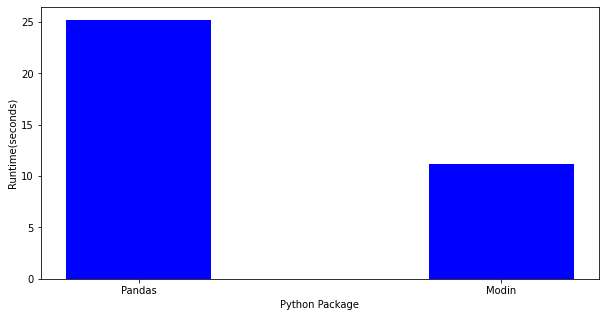

In [6]:
import time
import pandas

import modin.pandas as pd
import matplotlib.pyplot as plt
t0 = time.time()
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_time = time.time()- t0

t1 = time.time()
modin_df = pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_time = time.time() - t1

print("Pandas Time(seconds):",pandas_time,"\nModin Time(seconds):",modin_time)
outputDict={"Pandas":pandas_time,"Modin":modin_time}
plotter(outputDict)